<p> Universidade do Estado do Rio de Janeiro </p>
<p> Instituto Politécnico </p>
<p> IPRJ-01-10765: Modelos Lineares </p>
<p> Data: 07/04/2022 </p>

### **Trabalho 1**
**Grupo:**

Alunos:
- Matheus da Costa Harduim
- Hugo Marchon Barbosa
- Diogo Alves Cardinot
- Rayssa Montecchiari Branco
- Ibrahim Ayman Karsou

**Questão 1:**  Considerando o conjunto dados, responda as questões abaixo considerando o modelo simples e o
modelo de regressão linear simples:

Primeiramente, iremos considerar os seguintes dados que se referem ao preço do abacate e o volume total vendido. Ou seja, uma relação de quantas unidades de abacate sao vendidas de acordo com o preço.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('avocado.csv', sep=";")

x=np.array(df['AveragePrice'])
y = np.array(df['Total Volume'])

pd.DataFrame(df,columns=['AveragePrice','Total Volume'])

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60
...,...,...
18244,1.63,17074.83
18245,1.71,13888.04
18246,1.87,13766.76
18247,1.93,16205.22


#### a) Faça o gráfico das distribuições de cada uma das duas variáveis (Y e X). (Dois gráficos separados)

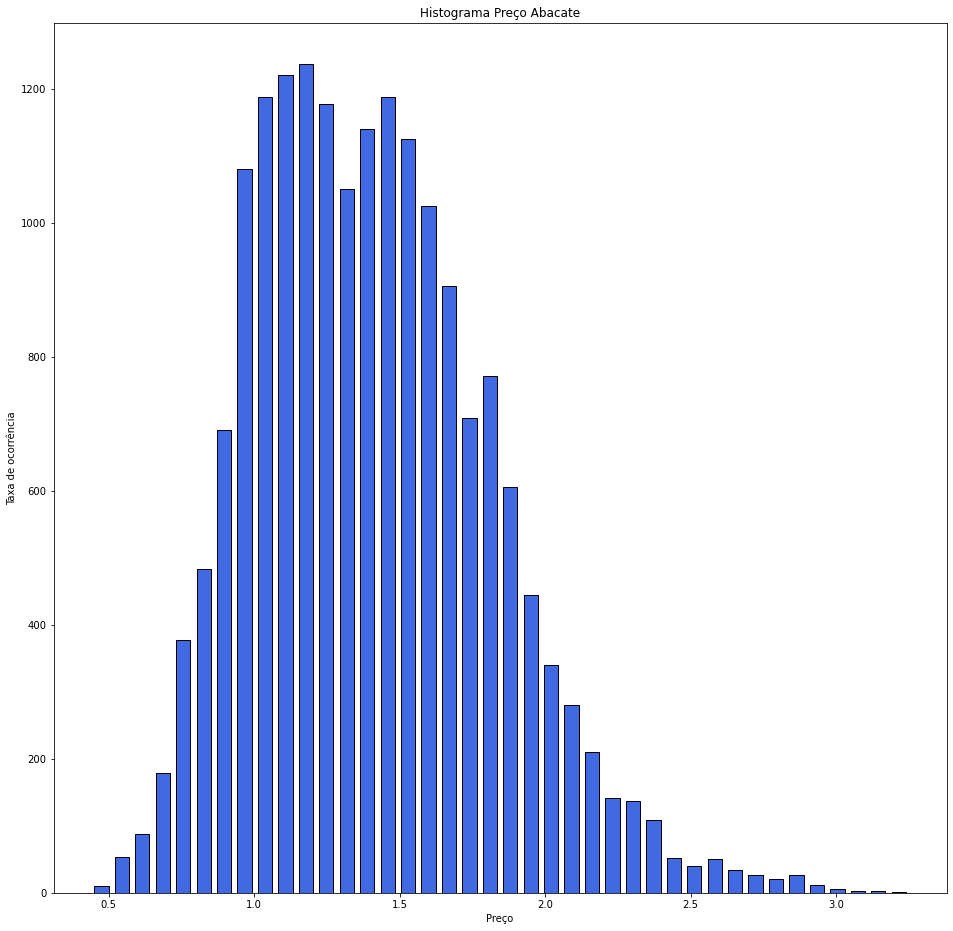

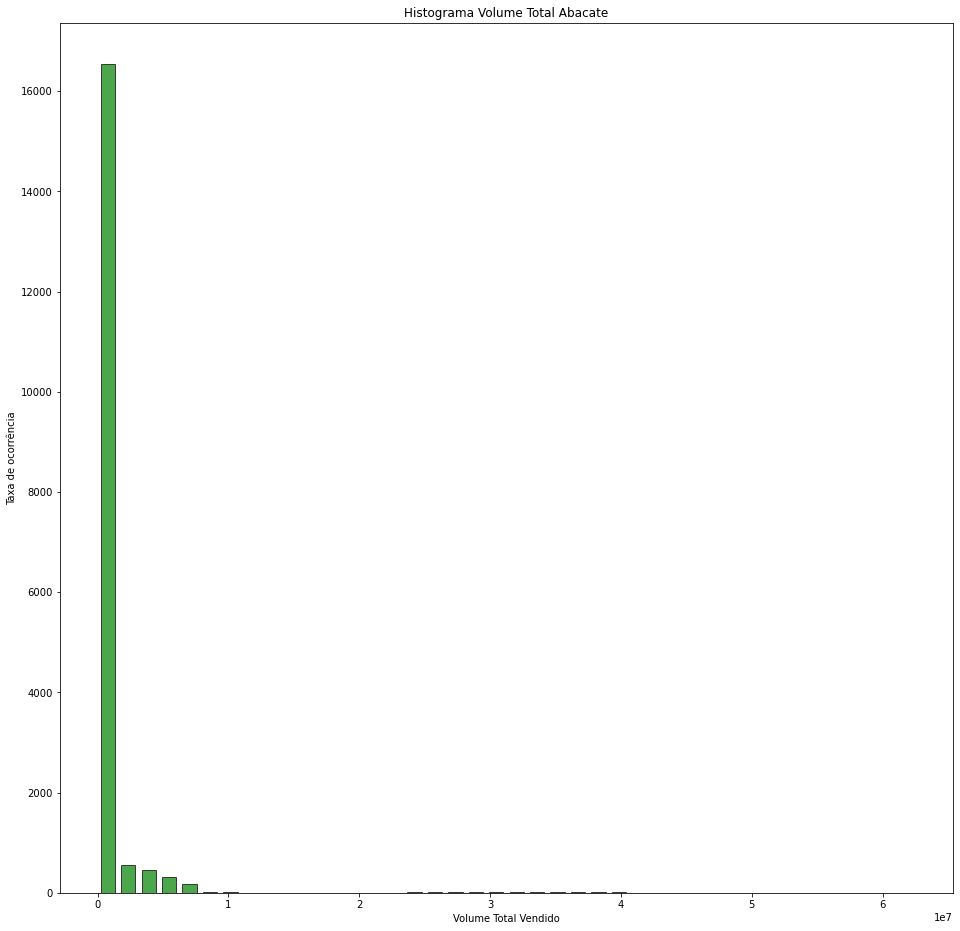

In [2]:
# HISTOGRAMA X
plt.figure(figsize=(16,16))
plt.title("Histograma Preço Abacate")
plt.xlabel("Preço")
plt.ylabel("Taxa de ocorrência")
plt.hist(x,bins = 40, ec = "k",rwidth=0.7,color = "royalblue")
plt.show()

#HISTOGRAMA Y
plt.figure(figsize=(16,16))
plt.title("Histograma Volume Total Abacate")
plt.xlabel("Volume Total Vendido")
plt.ylabel("Taxa de ocorrência")
plt.hist(y,bins = 40, ec = "k",rwidth=0.7,color='green', alpha=0.7)
plt.show()

#### b) Através das distribuições é possível identificar pontos influentes em alguma das variáveis? Comente.

Como sabe-se, em uma amostra de dados os pontos influentes são os pontos que tem uma recorrência bem menos frequente comparado a base de dados. Através de uma observação visual das taxas de ocorrência das duas variáveis em questão (Preço e Volume Total de Venda), pode-se perceber que, para a variável Preço, as menores taxas de ocorrência se encontram acima de 3. Já para a variável Volume Total Vendido, as taxas mais baixas se concentram a partir de ${0.8}*10^{7}$. Logo, todos os valores que satisfazem essas condições podem ser considerados pontos influentes.

#### c) Faça o gráfico xy do conjunto de dados. Visualmente, é possível identificar alguma correlação entre as variáveis?

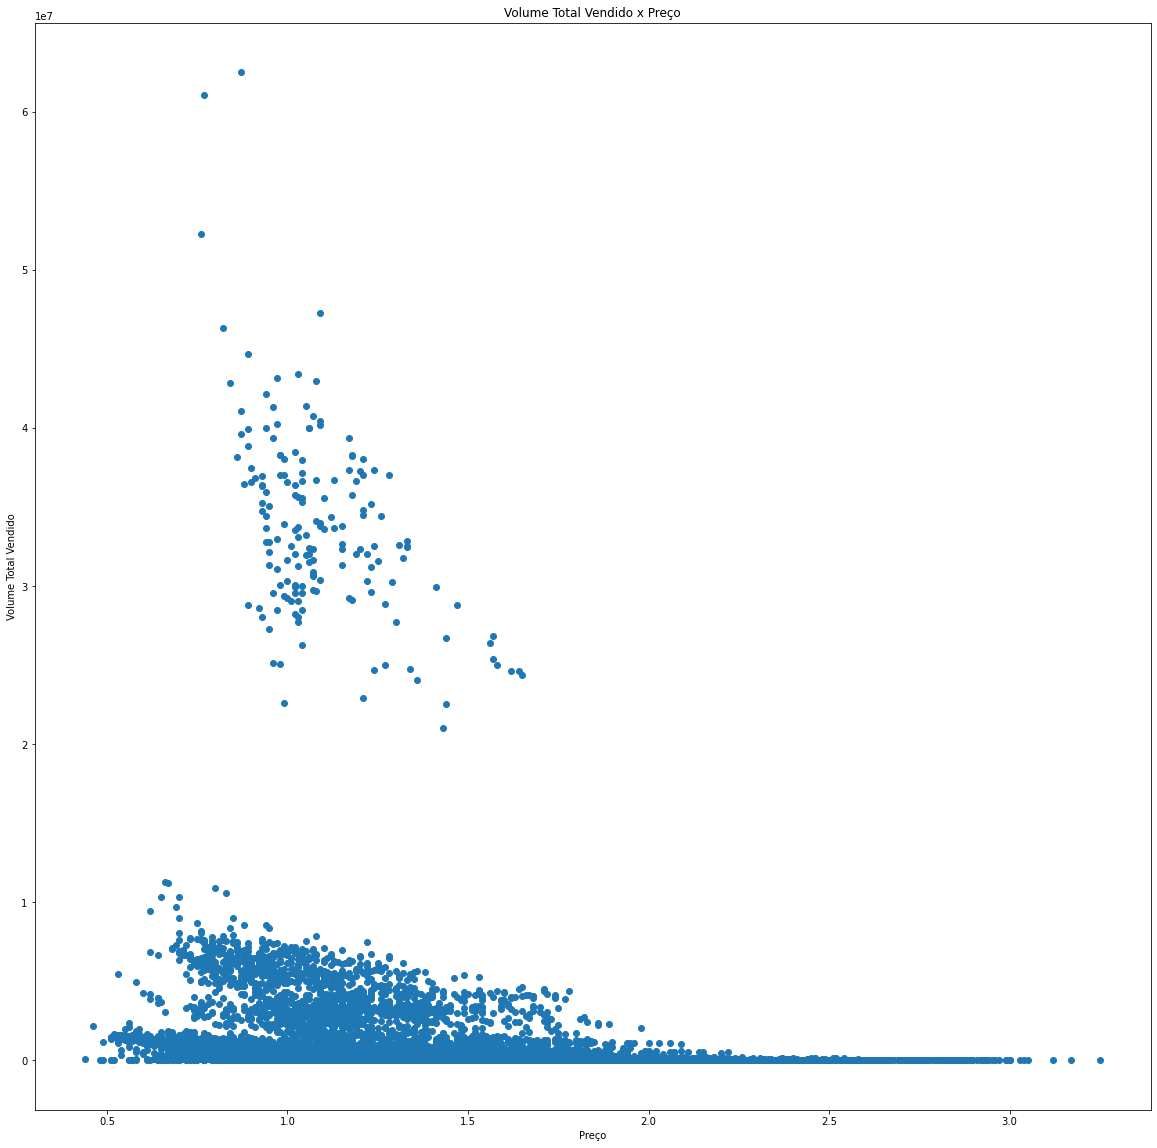

<Figure size 2304x864 with 0 Axes>

In [3]:
plt.figure(figsize=(20,20))
plt.title("Volume Total Vendido x Preço")
plt.xlabel("Preço")
plt.ylabel("Volume Total Vendido")
plt.plot(x,y,"o")
plt.figure(figsize = (32, 12))
plt.show()

A partir da análise visual do gráfico Volume Total Vendido x Preço, pode-se perceber que, conforme o preço aumenta, o volume total vendido diminui e, conforme o preço é menor, o volume total vendido aumenta. Como pode-se perceber, a análise em questão não é tão clara de ser visualizada, ainda mais com os valores dos pontos influentes sendo plotados.

#### d) Calcule o coeficiente de correlação e comente o resultado.

In [4]:
N = len(x)
print("Número de pontos:", N, "\n")
somatorioX = 0.0 #somatorio xi
somatorioY = 0.0 #somatorio yi
somatorioXiXmedioYiYmedio = 0.0 #somatorio (xi-x_medio)(yi-y_medio)
somatorioXiXmedio2 = 0.0 #somatorio (xi-x_medio)^2
somatorioYiYmedio2 = 0.0 #somatorio (yi-y_medio)^2

for i in range(N):
    somatorioX += x[i]
    somatorioY += y[i]
    
x_medio = somatorioX/N #x_medio 
y_medio = somatorioY/N #y_medio
    
for i in range(N):
    somatorioXiXmedioYiYmedio += (x[i]-x_medio)*(y[i]-y_medio)
    somatorioXiXmedio2 += (x[i]-x_medio)**2
    somatorioYiYmedio2 += (y[i]-y_medio)**2
    
coefCor = (somatorioXiXmedioYiYmedio)/np.sqrt(somatorioXiXmedio2*somatorioYiYmedio2)

# print("X_medio: ", x_medio)
# print("Y_medio: ", y_medio, "\n")
# print('Somatorio (xi-x_medio)(yi-y_medio): ', somatorioXiXmedioYiYmedio)
# print("Somatorio (xi-x_medio)^2: ", somatorioXiXmedio2)
# print("Somatorio (yi-y_medio)^2: ", somatorioYiYmedio2, "\n")
print("coeficienteCorrelacao:", coefCor)
print(somatorioY)

Número de pontos: 18249 

coeficienteCorrelacao: -0.19275238715271953
15523402593.40002


Com base no resultado obtido para o coeficiente de correlação, pode-ser medir a possível relação linear existente entre as variáveis aleatórias em questão, tal coeficiente, obrigatoriamente, deve ter seu valor entre -1 e 1, sendo que quanto mais próximo das extremidades a relação entre as variáveis é forte, sendo negativamente perto de -1 e positivamente perto de 1 e quanto mais perto de 0, a relação é fraca, logo, inexistente. 

Pode-se perceber que o coeficiente de correlação calculado para as variáveis do experimento se aproxima mais de 0 do que de -1, indicando que existe um grau fraco de correlação entre as variáveis, correlação essa que pode ser considerada linear negativa, uma vez que seu sinal é negativo.

#### e) Encontre a reta de quadrados mínimos (estime $β_0$, $β_1$ e ${σ}^{2}$ ).

In [5]:
somatorioX = 0.0
somatorioXX=0.0
somatorioY = 0.0
somatorioXY= 0.0
somatorioResiduos= 0.0
somatorioYChapeu= 0.0


for i in range(N):
    somatorioX += x[i]
    somatorioXX += x[i]**2
    somatorioY += y[i]
    somatorioXY += x[i] * y[i]


b_chapeu = (somatorioXY -  somatorioY*somatorioX/N)/(somatorioXX - (somatorioX)**2/N)
a_chapeu = ((somatorioY/N) ) - (b_chapeu/N) * somatorioX
var = (1/N)*somatorioYiYmedio2


# print("Somatorio de X:",somatorioX)
# print("Somatorio de x^2:",somatorioXX)
# print("Somatorio de y: ",somatorioY)
# print("Somatorio de x*y:",somatorioXY)
print("β_0:", a_chapeu)
print("β_1:", b_chapeu)
print("σ^2:", var)
print("A reta do mmq que melhor se ajusta aos dados e y=", a_chapeu, "+" , b_chapeu,"*x")

#Residuos
for i in range(N):
    y_chapeu = (a_chapeu + b_chapeu*x[i]) 
    e = y[i] - y_chapeu
    somatorioResiduos += e
    somatorioYChapeu += y_chapeu
#     print("y^=",y_chapeu,"||","e= ",e, "yi", y[i])


# print("Somatorio dos Residuos:", somatorioResiduos)
# # print("Somatorio de Y:", somatorioY)
# print("Somatorio de y: ",somatorioY)
# print("Somatorio de Y chapeu:", somatorioYChapeu)



#Plotando a reta do mmq que melhor se ajusta aos dados fornecidos
X = np.arange(0,1000,0.1)
Y = []

for i in range(len(X)):
    Y.append(a_chapeu + b_chapeu*X[i]) 

    


β_0: 3174917.5414396715
β_1: -1653136.0028503106
σ^2: 11926321953084.043
A reta do mmq que melhor se ajusta aos dados e y= 3174917.5414396715 + -1653136.0028503106 *x


#### f) Faça o gráfico dos dados no plano xy incluindo a reta de quadrados mínimos encontrada no item anterior.

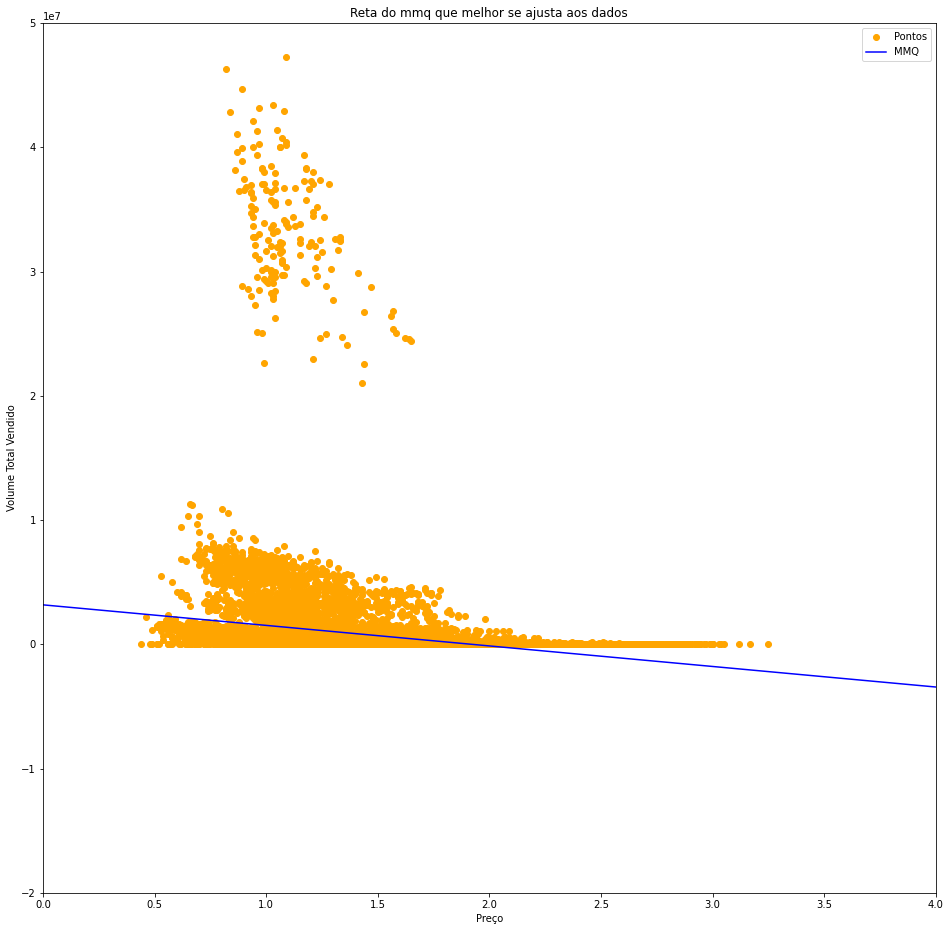

In [6]:
plt.figure(figsize=(16,16))
plt.plot(x,y,"o",label='Pontos',  color='orange')
plt.plot(X,Y,label='MMQ', color='blue')
plt.legend(['Pontos','MMQ'], loc=0)
# plt.axis([-1000,1000,-1000,1000])
plt.xlim(0,4)
plt.ylim(-20000000,50000000)
plt.title("Reta do mmq que melhor se ajusta aos dados")
plt.xlabel("Preço")
plt.ylabel("Volume Total Vendido")

plt.show()

#### g) Calcule os resíduos.

In [7]:
#Residuos
somatorioResiduos=0.0
somatorioYChapeu=0.0
e = []
y_chapeu = []
for i in range(N):
    y_chapeu.append(a_chapeu + b_chapeu*x[i]) 
    e.append(y[i] - y_chapeu[i])
    somatorioResiduos += e[i]
    somatorioYChapeu += y_chapeu[i]
    
       
pd.DataFrame({'y^': y_chapeu,'e': e})

,y^,e
0,9.762467e+05,-9.120100e+05
1,9.431839e+05,-8.883070e+05
2,1.637501e+06,-1.519281e+06
3,1.389531e+06,-1.310539e+06
4,1.058903e+06,-1.007864e+06
...,...,...
18244,4.803059e+05,-4.632310e+05
18245,3.480550e+05,-3.341669e+05
18246,8.355322e+04,-6.978646e+04
18247,-1.563494e+04,3.184016e+04


[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y')]

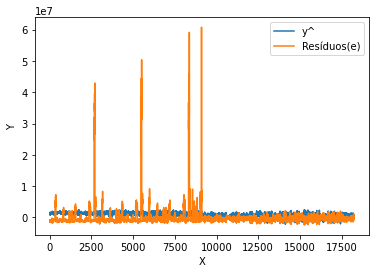

In [8]:
pd.DataFrame({'y^': y_chapeu,'Resíduos(e)': e}).plot().set(xlabel='X', ylabel='Y')

In [9]:
print("Somatorio dos Residuos:", somatorioResiduos)

Somatorio dos Residuos: -0.0001692185760475695


#### h) Comente sobre os valores dos resíduos e os pontos influentes visualmente detectados no item b).

É possivel verificar que em pontos identificados como influentes os resíduos são mais altos, e isso pode
ser comprovado quando retiramos esses pontos e refazemos os cálculos (operação complementar feita
na letra j).

Pode-se perceber também que a soma dos resíduos se aproxima de 0 que, de acordo com a teoria, comprova que os cálculos realizados sobre os resíduos foram satisfatórios.

#### i) Monte a tabela ANOVA e, para o intervalo de confiança de 95%, verifique se a hipótese nula (modelo simples) é rejeitada (utilize a tabela da distribuição F do livro).

In [10]:
somatorioYiYchapeu2 = 0.0 #(yi-y_chapeu)**2
somatorioXiXmedio2= 0.0 #(xi-x_medio)**2
somatorioYiYmedio2 = 0.0 #(yi-y_medio)**2
SQReg= 0.0 
SQT  = 0.0


beta_0 = a_chapeu
beta_1 = b_chapeu

for i in range(N):
    y_chapeu = (beta_0 + beta_1*x[i]) 
    somatorioYiYchapeu2 += (y[i]-y_chapeu)**2
    somatorioXiXmedio2 += (x[i]-x_medio)**2
    somatorioYiYmedio2 += (y[i]- y_medio)**2
#     print("y_chapeu=",y_chapeu)
    
 
varMSMRLS = (somatorioYiYchapeu2)/(N-2)    
SQReg = (beta_1**2)*somatorioXiXmedio2
SQT = somatorioYiYmedio2
SQE = SQT - SQReg
F_0 = SQReg/(SQE/(N-2))


print("Variancia MSxMRLS: ", varMSMRLS)
print("SQReg: ", SQReg)
print("SQT: ", SQT)
print("SQE: ", SQE)
print("F_0: ", F_0)

if(F_0> 3.84): #Substituir o 3.84 pelo valor da tabela de Fischer
    print("Pode-se rejeitar a Hipótese H0:β_1=0")
else:
    print("Não se pode rejeitar a Hipótese H0:β_1=0")

#Valor de 95% é 3.84, logo, como F_0>1F(n-2), rejeitamos H0:β_1=0, ou seja, o coeficiente angular não pode ser nulo

Variancia MSxMRLS:  11484476197793.133
SQReg:  8086212140697895.0
SQT:  2.176434493218307e+17
SQE:  2.095572371811328e+17
F_0:  704.0993425761717
Pode-se rejeitar a Hipótese H0:β_1=0


In [11]:
import csv
with open('./tabelaANOVA.csv', 'w',newline='') as csvfile:

    writer = csv.DictWriter(csvfile, delimiter=';', fieldnames=['Fonte de Variação(FV)','Graus de Liberdade(GL)','Soma de Quadrados(SQ)','Quadrados Médios(QM)','Estatística do Teste(F0)','Valor intervalo de confiança 95%'])

    writer.writeheader()
    csv.writer(csvfile, delimiter=';').writerow(['Regressão', 1,SQReg,SQReg, SQReg/(SQE/(N-2)), "3.84"])
    csv.writer(csvfile, delimiter=';').writerow(["Erro", N-2, SQE, SQE/(N-2)])
    csv.writer(csvfile, delimiter=';').writerow(["Total", N-1, SQT])

#### j) Retire os pontos classificados como influentes e repita os passos e) e f). Comente sobre os resultados.

In [12]:
##RETIRANDO PONTOS INFLUENTES DE y > 0.8*10^7
filt = df[df['Total Volume'] < 0.8*10**7]
x_filter1=np.array(filt['AveragePrice'])
y_filter1 = np.array(filt['Total Volume'])
df_novo = pd.DataFrame(filt,columns=['AveragePrice','Total Volume'])


##RETIRANDO PONTOS INFLUENTES DE X > 3
filt1 = df_novo[df_novo['AveragePrice'] < 3]
df_novo1 = pd.DataFrame(filt1,columns=['AveragePrice','Total Volume'])
pd.DataFrame(df_novo1,columns=['AveragePrice','Total Volume'])

##RETIRANDO PONTOS INFLUENTES DE X < 0.5
filt2 = df_novo1[df_novo1['AveragePrice'] > 0.5]
df_novo2 = pd.DataFrame(filt2,columns=['AveragePrice','Total Volume'])
x_filter=np.array(filt2['AveragePrice'])
y_filter = np.array(filt2['Total Volume'])
pd.DataFrame(df_novo2,columns=['AveragePrice','Total Volume'])

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60
...,...,...
18244,1.63,17074.83
18245,1.71,13888.04
18246,1.87,13766.76
18247,1.93,16205.22


#### Reta de quadrados mínimos (estime $β_0$, $β_1$ e ${σ}^{2}$ ).

In [13]:
N_filter = len(x_filter)
somatorioX = 0.0
somatorioXX=0.0
somatorioY = 0.0
somatorioXY= 0.0
somatorioResiduos= 0.0
somatorioYChapeu= 0.0


for i in range(N_filter):
    somatorioX += x_filter[i]
    somatorioXX += x_filter[i]**2
    somatorioY += y_filter[i]
    somatorioXY += x_filter[i] * y_filter[i]


b_chapeu = (somatorioXY -  somatorioY*somatorioX/N)/(somatorioXX - (somatorioX)**2/N)
a_chapeu = ((somatorioY/N) ) - (b_chapeu/N) * somatorioX
var = (1/N)*somatorioYiYmedio2


# print("Somatorio de X:",somatorioX)
# print("Somatorio de x^2:",somatorioXX)
# print("Somatorio de y: ",somatorioY)
# print("Somatorio de x*y:",somatorioXY)
print("β_0:", a_chapeu)
print("β_1:", b_chapeu)
print("σ^2:", var)
print("A reta do mmq que melhor se ajusta aos dados e y=", a_chapeu, "+" , b_chapeu,"*x")

#Residuos
for i in range(N_filter):
    y_chapeu = (a_chapeu + b_chapeu*x_filter[i]) 
    e = y_filter[i] - y_chapeu
    somatorioResiduos += e
    somatorioYChapeu += y_chapeu
#     print("y^=",y_chapeu,"||","e= ",e, "yi", y[i])


# print("Somatorio dos Residuos:", somatorioResiduos)
# # print("Somatorio de Y:", somatorioY)
# print("Somatorio de y: ",somatorioY)
# print("Somatorio de Y chapeu:", somatorioYChapeu)



#Plotando a reta do mmq que melhor se ajusta aos dados fornecidos
X = np.arange(0,1000,0.1)
Y = []

for i in range(len(X)):
    Y.append(a_chapeu + b_chapeu*X[i]) 


β_0: 1704013.8582357964
β_1: -843279.066983308
σ^2: 11926321953084.043
A reta do mmq que melhor se ajusta aos dados e y= 1704013.8582357964 + -843279.066983308 *x


#### Faça o gráfico dos dados no plano xy incluindo a reta de quadrados mínimos encontrada.

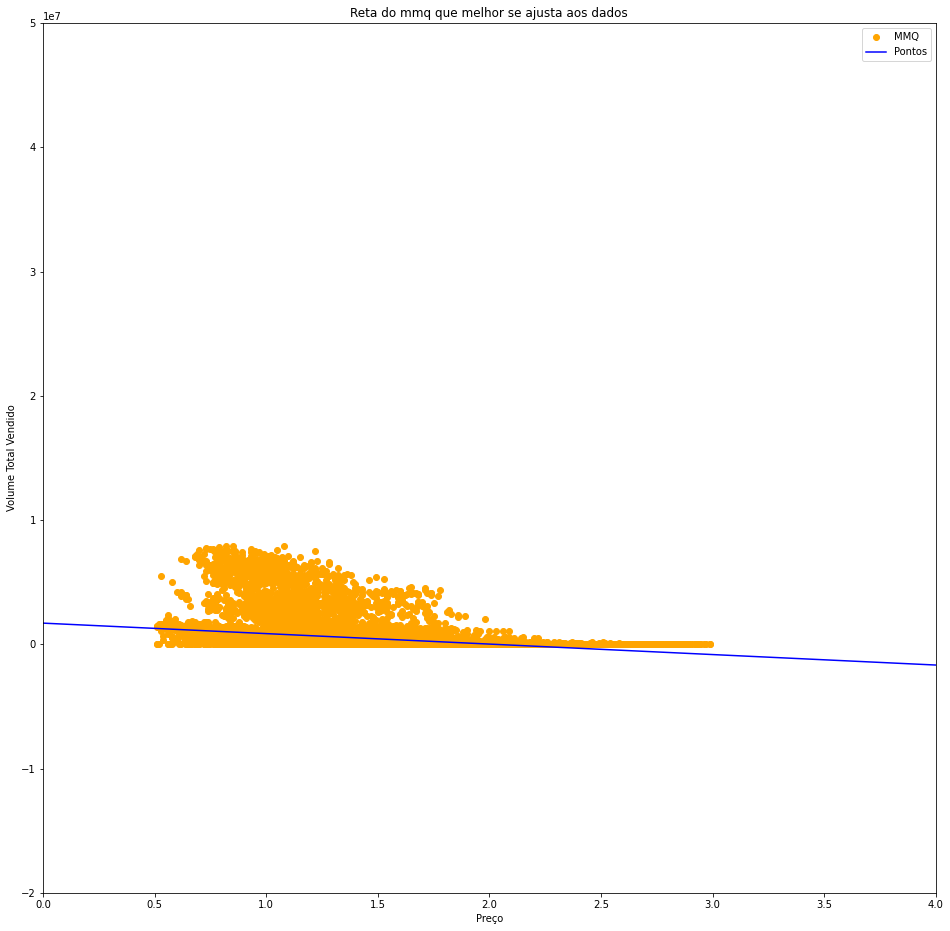

In [14]:
plt.figure(figsize=(16,16))
plt.plot(x_filter,y_filter,"o",label='Pontos',  color='orange')
plt.plot(X,Y,label='MMQ', color='blue')
plt.legend(['MMQ','Pontos'], loc=0)
# plt.axis([-1000,1000,-1000,1000])
plt.xlim(0,4)
plt.ylim(-20000000,50000000)
plt.title("Reta do mmq que melhor se ajusta aos dados")
plt.xlabel("Preço")
plt.ylabel("Volume Total Vendido")

plt.show()

#### Resíduos tirando os pontos influentes.

In [15]:
 #Residuos sem os pontos influentes
somatorioResiduos=0.0
somatorioYChapeu=0.0
e = []
y_chapeu = []
for i in range(N_filter):
    y_chapeu.append(a_chapeu + b_chapeu*x_filter[i])
    e.append(y_filter[i] - y_chapeu[i])
    somatorioResiduos += e[i]
    somatorioYChapeu += y_chapeu[i]
pd.DataFrame({'y^': y_chapeu,'e': e})

,y^,e
0,582452.699148,-518216.079148
1,565587.117808,-510710.137808
2,919764.325941,-801544.105941
3,793272.465894,-714280.315894
4,624616.652497,-573577.052497
...,...,...
18044,329468.979053,-312394.149053
18045,262006.653694,-248118.613694
18046,127082.002977,-113315.242977
18047,76485.258958,-60280.038958


(-5000000.0, 60000000.0)

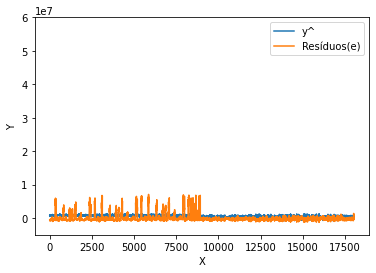

In [16]:
pd.DataFrame({'y^': y_chapeu,'Resíduos(e)': e}).plot().set(xlabel='X', ylabel='Y')
plt.ylim(-0.5*10**7,6*10**7)

Como pode-se perceber pelo novo gráfico dos resíduos, após a retirada dos pontos influentes os resíduos tiveram seu valor diminuido, uma vez que o maior valor do resíduo com os pontos influentes era de ${6.5}*10^{7}$ e, com a retirada desses pontos, seu maior valor foi de ${6.5}*10^{6}$, confirmando assim o que foi avaliado na letra h.

Pode-se perceber que, após a retirada dos pontos influentes obteve-se valores menores para os resíduos, comprovando assim que pontos influentes tendem a gerar resíduos com valores altos, o que pode ser verificado nos gráficos apresentados.